# SetUp

## Imports

In [1]:
# Standard imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ML imports.
import torch
from torchvision import transforms, models

2023-10-09 11:16:04.397385: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-09 11:16:04.706801: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 11:16:05.717856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Imports to read images.
from PIL import Image

## Input processing
Input: Images

In [8]:
home_dir = ''

image_url_cat = home_dir + "/home/fabrice/Pictures/cat.jpeg"
image_url_cat_squirl = home_dir + "/home/fabrice/Pictures/cat_and_squirl.jpeg"
imagenet_classes_path = home_dir + "/home/fabrice/Pictures/ImageNet1000Classes.txt"

In [9]:
img0 = Image.open(image_url_cat)
img1 = Image.open(image_url_cat_squirl)
imgs = [img0, img1]

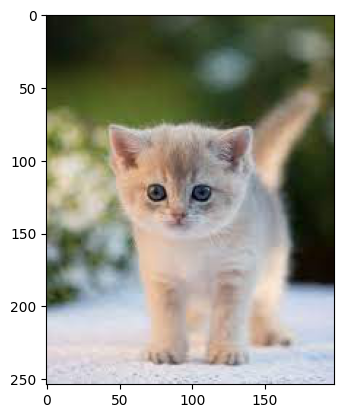

In [10]:
plt.imshow(img0)

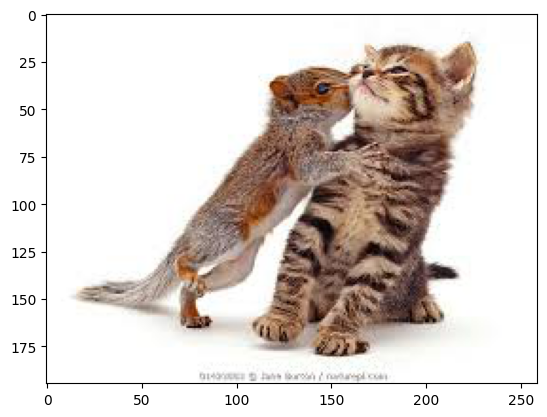

In [11]:
plt.imshow(img1)

In [12]:
# Load the imagenet classes.
with open(imagenet_classes_path) as classesfile:
    imagenet_classes = [line.strip() for line in classesfile.readlines()]

## Transforms (ResNet and Alex Net)

In [13]:
# Define the desired image transformations.
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [14]:
# Apply the transformations.
imgs_t = []
for img in imgs:
    imgs_t.append(transform(img))

In [15]:
for img in imgs_t:    
    print(f"Shape: {img.shape},\tType: {type(img)}")

Shape: torch.Size([3, 224, 224]),	Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 224, 224]),	Type: <class 'torch.Tensor'>


In [16]:
# Convert the images into a Batch Format
imgs_batch = []
for img in imgs_t:
    imgs_batch.append(torch.unsqueeze(img, 0))

In [17]:
for img in imgs_batch:    
    print(f"Shape: {img.shape},\tType: {type(img)}")

Shape: torch.Size([1, 3, 224, 224]),	Type: <class 'torch.Tensor'>
Shape: torch.Size([1, 3, 224, 224]),	Type: <class 'torch.Tensor'>


## Model evaluation methods

In [18]:
def eval_for_single_class(model_output):
    # Get the prediction with highest confidence.
    _, predicted_class = torch.max(model_output, 1)
    # Apply the softmax function to the confidence, to get a percent value.
    percentage = torch.softmax(model_output, dim=1)[0] * 100
    # Look up the name/text-description of the predicted class and return it with the confidence in percent.
    return imagenet_classes[predicted_class[0]], percentage[predicted_class[0]].item()

In [19]:
def eval_for_multi_class(model_output, n=5):
    # Rank the predictions by highest confidence.
    _, predicted_classes = torch.sort(output, descending=True)
    # Apply the sigmoid function to the confidences, to get percent values.
    percentages = torch.sigmoid(output)[0] * 100
    # Look up the names/text-descriptions of the predicted classes and return them with their confidences in percent.
    # Only return the 'n' highest.
    return [(imagenet_classes[i], percentages[i].item()) for i in predicted_classes[0][:n]]

# ResNet

## Single-Label Classification

In [20]:
# Print all torchvision models.
# dir(models)

In [21]:
# Load the ResNet Model.
resnet = models.resnet50(weights='DEFAULT')
# Activate the evaluation mode.
resnet.eval()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/fabrice/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████████████████████████████████| 97.8M/97.8M [00:26<00:00, 3.94MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [74]:
output = resnet(imgs_batch[0])
print(eval_for_single_class(output))

NameError: name 'resnet' is not defined

## Multi-Label Classification

In [66]:
# Load the ResNet Model.
resnet = models.resnet152(weights='DEFAULT')
# Activate the evaluation mode.
resnet.eval()

Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /home/fabe12/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth


URLError: <urlopen error [Errno 101] Network is unreachable>

In [ ]:
output = resnet(imgs_batch[1])
print(eval_for_multi_class(output))

# AlexNet

## Single-Label Classification

In [73]:
# Load the AlexNet Model.
alexnet = models.alexnet(weights='DEFAULT')
alexnet.eval()
output = alexnet(imgs_batch[0])

print(eval_for_single_class(output))

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/fabe12/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


URLError: <urlopen error [Errno 101] Network is unreachable>

## Multi-Label Classification

In [ ]:
# Load the ResNet Model.
resnet = models.alexnet(weights='DEFAULT')
# Activate the evaluation mode.
resnet.eval()
output = resnet(imgs_batch[1])
print(eval_for_multi_class(output))